# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 2

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 35 баллов
* Задача 5 &mdash; 15 баллов
* Задача 6 &mdash; 15 баллов 




-----

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

%matplotlib inline

Для выполнения задания вы можете установить свою палитру цветов при отрисовке графиков с помощью кода ниже. Если введете несуществующее имя, то вам напечатается список возможных палитр. Также вы можете устанавливать свои цвета конкретным объектам на графиках, обычно это делается с помощью аргумента `color`.

In [2]:
sns.set_palette('Set2')

### Задача 1

Для выполнения задания выберите любой профиль, ваш выбор сохранится на весь семестр, изменить профиль будет нельзя. Студенты кафедры инновационная педагогика выполняют задание по профилю педагогика. Студенты ЛФИ, для которых этот курс обязательный, выполняют задания по профилю физика.

**Профиль биология**

Скачайте <a href="https://www.kaggle.com/ruslankl/mice-protein-expression
">датасет</a> с данными об экспрессии белков у белых мышей. Данный датасет состоит из таблицы значений уровней экспрессии 77 различных белков в мозге у мышей. Каждая строка соответствует одной особи, каждый столбец соответствует одному белку. На столбцы Genotype, Treatment и подобные пока не обращаем внимания. 

Для исследования рекомендуется выбрать столбцы 'ITSN1_N', 'DYRK1A_N', 'pBRAF_N', 'pCREB_N', но можно взять и другие.

**Профиль физика (+профиль химия)**

Скачайте <a href="https://www.kaggle.com/fedesoriano/cern-electron-collision-data
">датасет</a> с данными о столкновении электронов на Большом Адронном Коллайдере. 

Данный датасет  содержит информацию о событиях столкновения двух электронов. Он состоит из таблицы различных параметров столкновений. Каждая строка соответствует одному столкновению, каждый столбец соответствует одному параметру. Например, в столбцах E1, E2 записаны значения энергии сталкивающихся электронов, в столбцах px1, py1, pz1, px2, py2, pz2 — значения моментов импульса, в столбцах Q1, Q2 $-$ заряды электронов.

Для исследования рекомендуется выбрать столбцы 'E2', 'px2', 'eta2', 'phi2'. Все эти столбцы — некоторые параметры второго электрона. Можно взять и другие столбцы.

**Профиль педагогика**

Скачайте <a href="https://www.kaggle.com/spscientist/students-performance-in-exams
">датасет</a> с данными о результатах учащихся на экзаменах.

Данный датасет состоит из таблицы баллов учащихся на экзаменах по математике, чтению и письму, а также дополнительной информации о студентах. Каждая строка соответствует одному учащемуся, каждый столбец соответствует одному признаку. В столбцах math score, reading score и writing score записаны баллы за экзамены.

Для исследования возьмите столбцы 'math score', 'reading score', 'writing score'.

----

Чтобы скачать данные, зарегистрируйтесь на сайте, после нажмите download на странице датасета и распакуйте скачанный архив. Вы получите файл формата `csv`.

Если вы работаете в Google Colab, можно загрузить полученный файл в разделе "Файлы" (значок папки) на левой панели.

In [4]:
# эта функция читает данные, в кавычках укажите путь к файлу на вашем компьютере или в Colab
#df = pd.read_csv("./Data_Cortex_Nuclear.csv")
#df = pd.read_csv("./dielectron.csv")
df = pd.read_csv("./StudentsPerformance.csv")

Посмотрим на первые строки этой таблицы.

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Выберите несколько (3-6) столбцов для анализа значений в них.

In [15]:
# укажите столбцы данных 
# Пример: columns = ['math score', ...]
columns = ['reading score','writing score','math score']

df_chosen_columns = df[columns]

#Одномерный массив значений одного признака (например, 'math score') можно получить так:
#df_chosen_columns['math score']

#### Гистограммы

Для каждого из выбранных признаков нарисуйте гистограмму распределения. Для этого воспользуйтесь функцией `plt.hist`.

*Примечание.* В анализе данных обычно используется слово "признак" для обозначения исследуемого свойства объекта. Например, для биологического датасета признаком является белок.


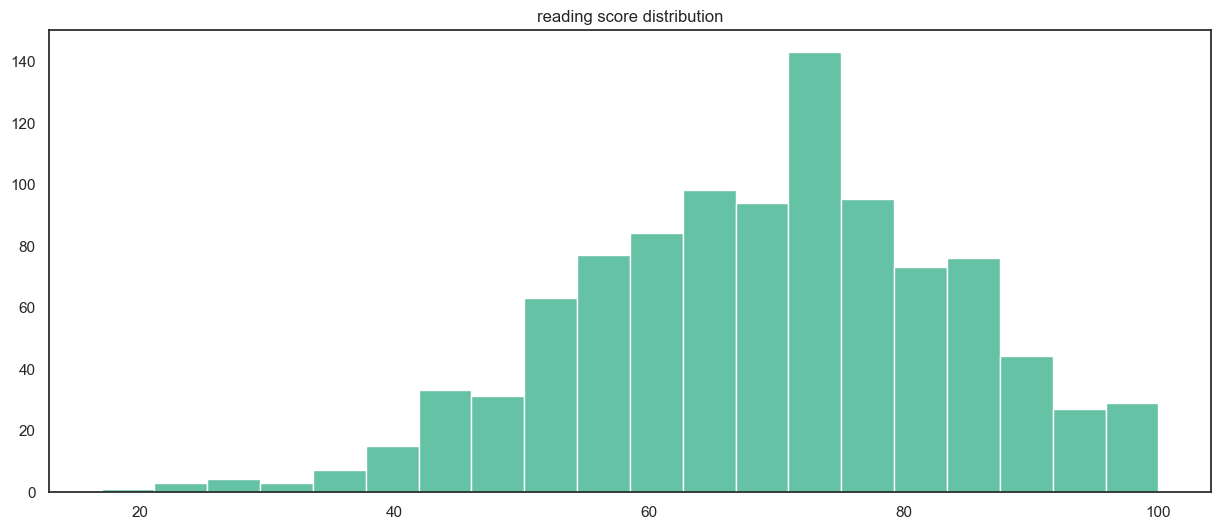

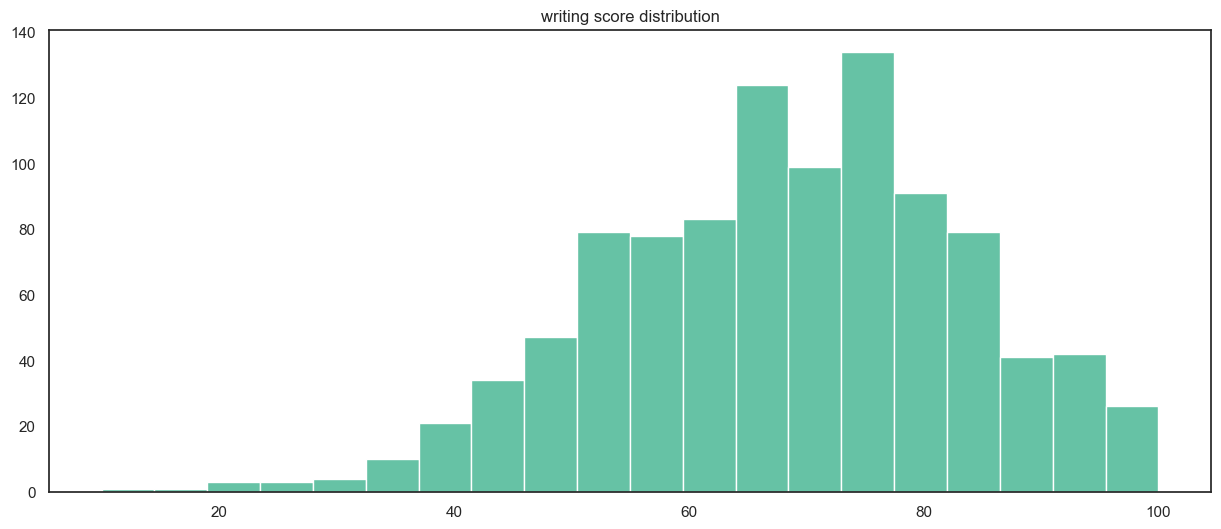

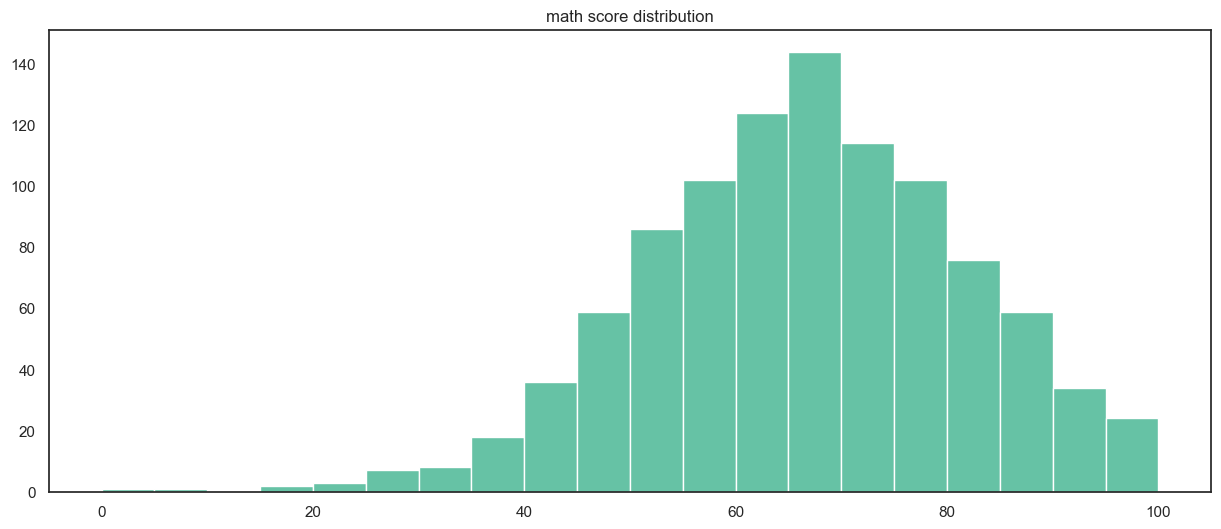

In [16]:
for i, column in enumerate(columns):
    plt.figure(figsize=(15, 6))
    
    plt.hist(df[column], bins=20)
    plt.title(column + ' distribution');

Выбросы — значения, которые сильно отличаются от большинства значений выборки. Они могут возникать из-за ошибки измерения, из-за необычной природы входных данных, но также могут быть и частью распределения.

По гистограммам предположите, в каких из исследуемых признаков могут быть выбросы?

**Ответ:**

Выбросы могут сильно портить внешний вид графика.

Продемонстрируем это на примере. Сгенерируем выборку размера 1000 из стандартного нормального распределения и построим по ней гистограмму. В библиотеке `scipy` это можно сделать с помощью метода `rvs`

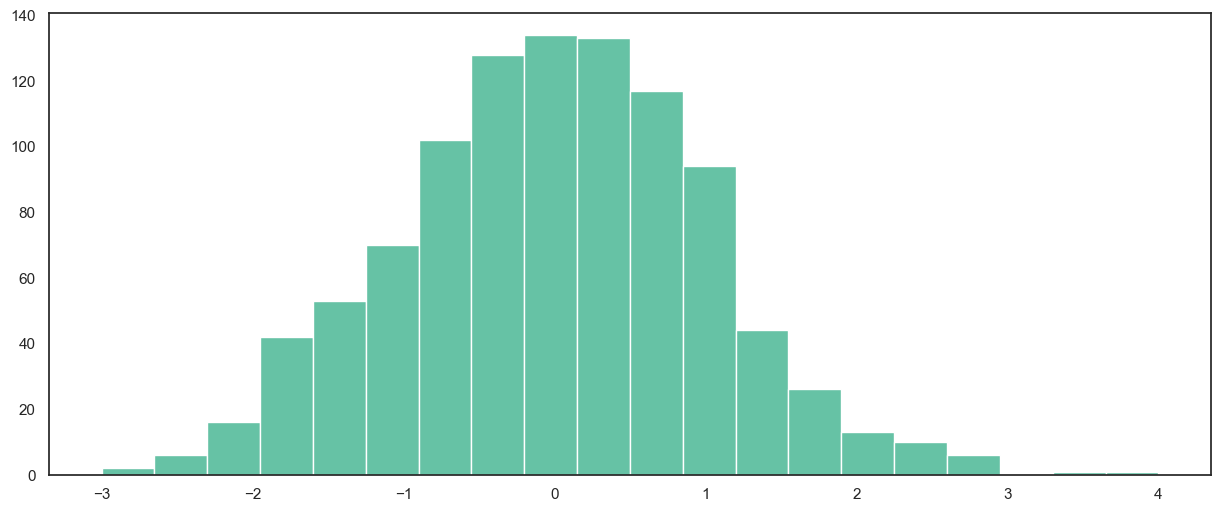

In [17]:
sample = sps.norm.rvs(size=1000)

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Как видим, большая часть значений находятся в промежутке от -3 до 3.

Теперь добавим выброс — очень большое значение, которое могло появиться, например, в результате ошибок измерения. Допустим, что выброс — первое измерение.

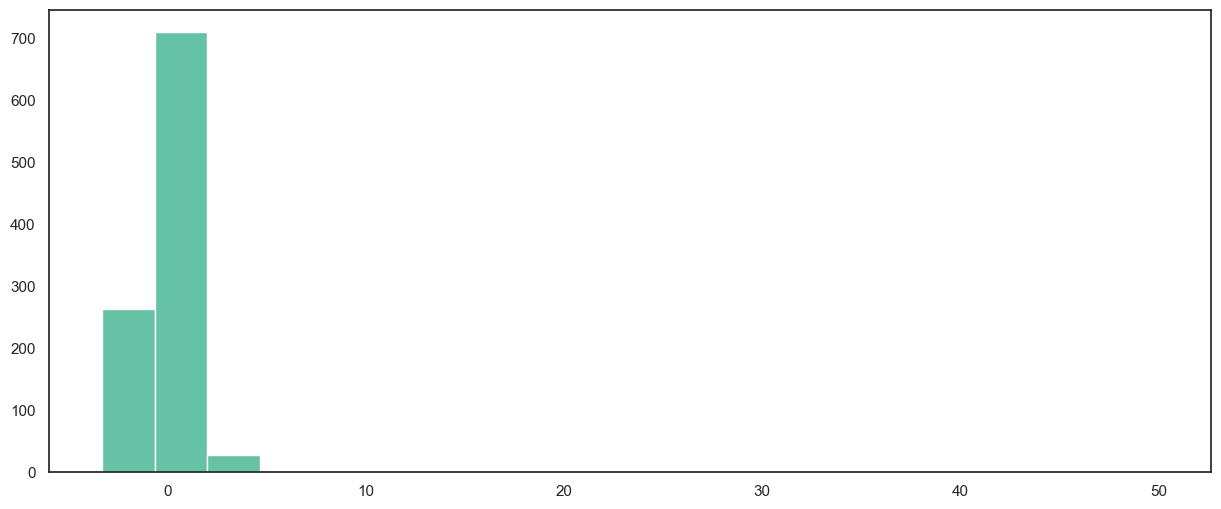

In [18]:
outlier = 50
sample[0] = outlier

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20);

По такому графику уже нельзя сделать предположение о распределении выборки.
Также обратите внимание, что большая часть графика пустая, что говорит о неинформативности данного графика.

Эту проблему с графиками можно решить с помощью параметра `range`, который определяет, в каких границах строится гистограмма.

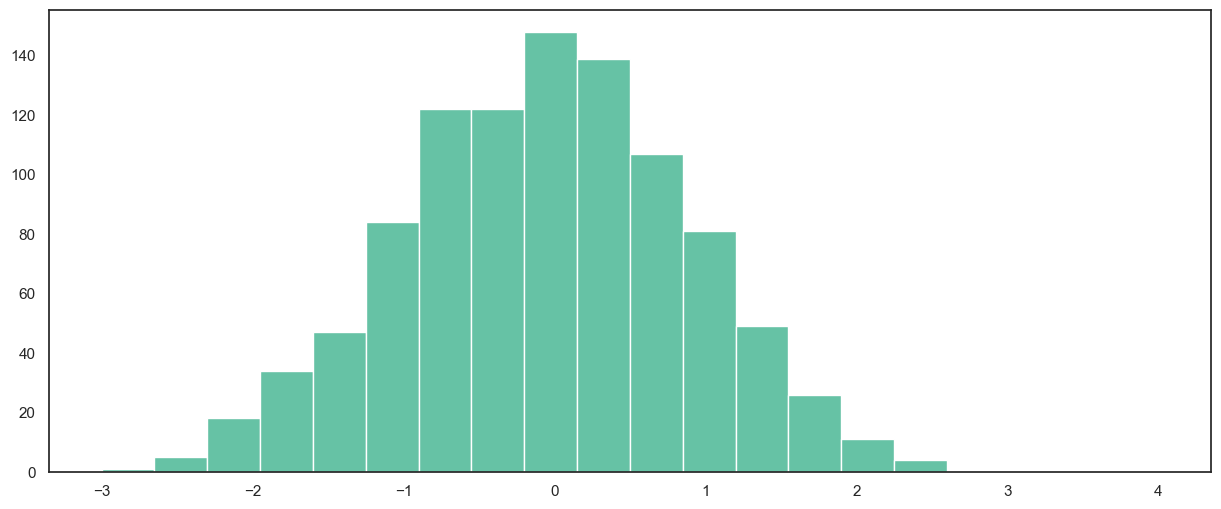

In [12]:
plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Проделайте то же самое с теми столбцам, в которых, как вы считаете, есть выбросы.

В словаре `ranges_without_outliers` укажите, в каких пределах, по вашему мнению, стоит нарисовать гистограмму распределения для каждого признака.

Пример заполнения словаря на ячейке ниже. 

Здесь мы считаем, что для признака `column1` большая часть значений находится в промежутке от -1 до 5, а все значения за пределами этого промежутка — выбросы.
Мы хотим нарисовать информативный график для гистограммы значений признака `column1`, поэтому гистограмму будем строить только на основе значений из промежутка (-1, 5)

Аналогично для признака `column2`

In [13]:
ranges_without_outliers_example = {
    'column1' : (-1, 5),
    'column2' : (0, 3)
}

Аналогично определите интервалы для исследуемых признаков

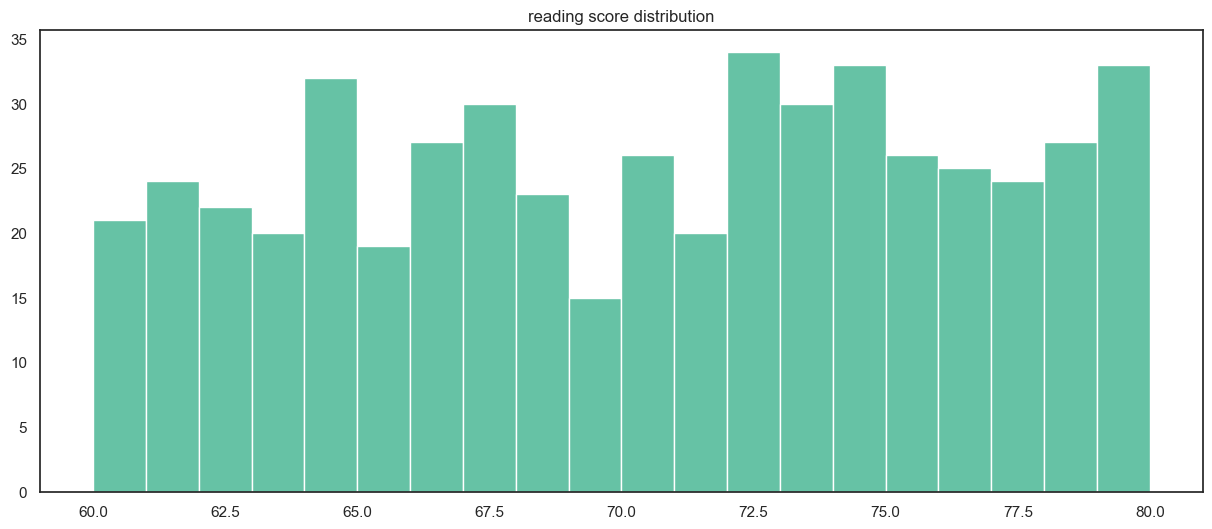

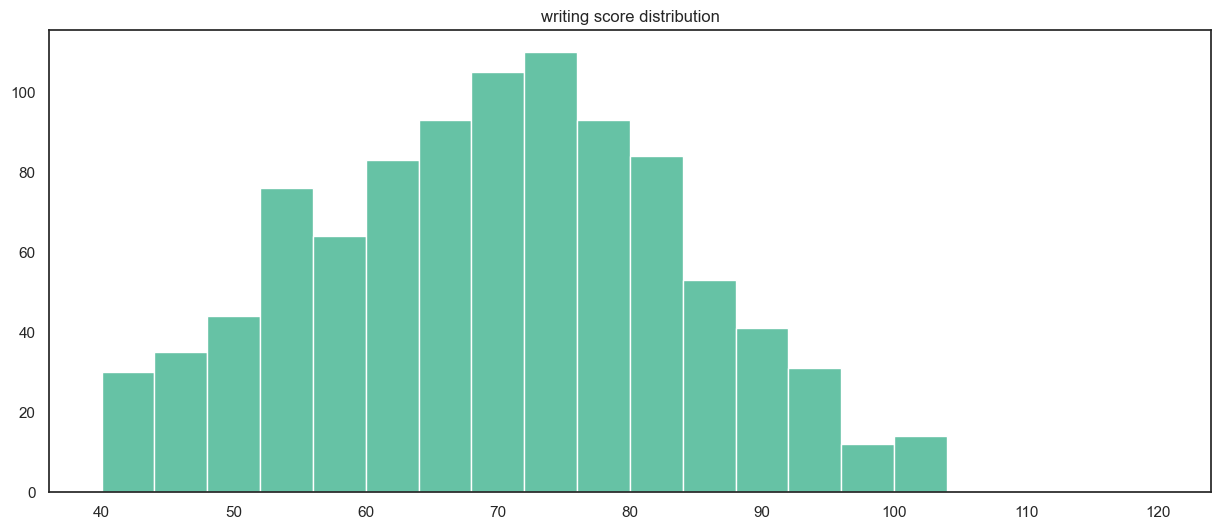

In [20]:
ranges_without_outliers = {
    'reading score' : (60,80),
    'writing score' : (40, 120)
}


for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.hist(df[column], range=column_range, bins=20)
    plt.title(column + ' distribution')

**Сделайте выводы** 

Изменилась ли форма распределений, стали ли графики информативнее?

**Ответ:** Форма распределения изменилась.
График в приведенном кейсе не стал информативнее

### Задача 2

В этой задаче нужно визуализировать *закон больших чисел* (обратите внимание на ноутбук "Простейший анализ данных").



Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из некоторого распределения, причем $\mathsf{E}\xi_i = a$. Тогда выполнена сходимость $$\frac{\xi_1 + ... + \xi_n}{n} \stackrel{п.н.}{\longrightarrow} a.$$ 

*Замечание 1.* Закон больших чисел имеет несколько формулировок. Данная формулировка часто называется *усиленным законом больших чисел*. В частности, усиленной она является, поскольку в отличии от "простой" версии она не требует условия на дисперсии и утверждает о более сильной сходимости "почти наверное".

*Замечание 2.* Последовательность случайных величин $\xi_1, \xi_2, ...$ сходится почти наверное к случайной величине $\xi$, если $\mathsf{P}\big(\big\{ \omega \in \Omega\:\big|\: \xi_n(\omega) \to \xi(\omega)\big\}\big) = 1$

---








Рассмотрим распределение Коши с плотностью
$$p(x)=\frac{1}{\pi(1+x^2)}$$
 
для  $x\in\mathbb{R}$
 , которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при  $x \to \infty$
 . Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс [`scipy.stats.cauchy`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html).



1. Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?



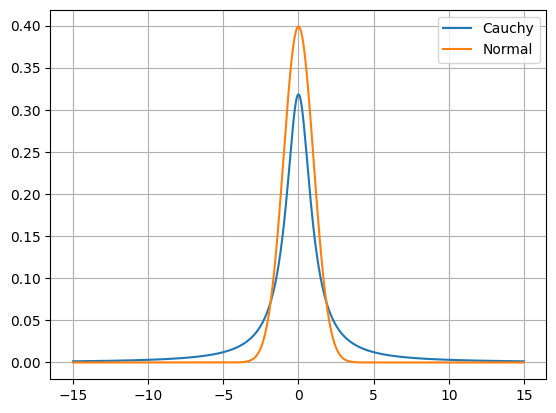

In [3]:
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
tfd = tfp.distributions
x = np.linspace(-15,15,1000)
cauchy_dist = tfd.Cauchy(loc=0., scale=1.)
normal_dist = tfd.Normal(loc=0., scale=1.)
plt.plot(x,cauchy_dist.prob(x),label='Cauchy')
plt.plot(x,normal_dist.prob(x),label='Normal')
plt.grid()
plt.legend()

Хвосты распределения Коши тяжелее чем хвосты стандратного нормального распределения

2. Повторите эксперимент с занятия про закон больших чисел для распределения Коши. Выполняется ли закон?



Ненормально: p_value: 0.0 < 0.05


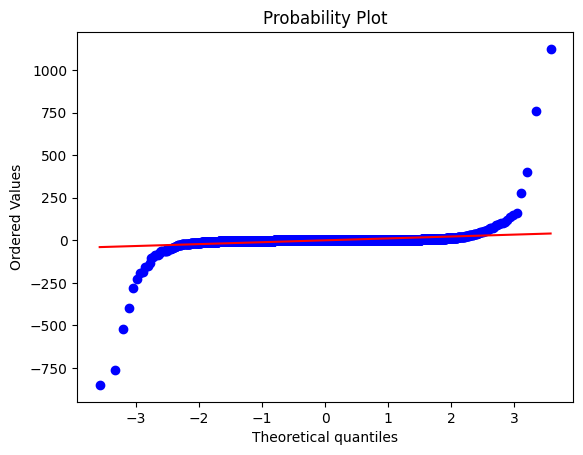

In [4]:
import tensorflow as tf
import tensorflow_probability as tfp
import scipy.stats as stats

n = 400

x = tf.reduce_mean(cauchy_dist.sample([n*10,n]),axis=1)

stats.probplot(x, dist="norm",plot=plt)
# выполняем Shapiro-Wilk тест для проверки нормальности распределения  
res = stats.shapiro(x)
if res.pvalue > 0.05:
    print('Нормально: p_value: {} > 0.05'.format(res.pvalue))
else:
    print('Ненормально: p_value: {} < 0.05'.format(res.pvalue))

Распределение не нормально


P.s. Распределение Коши стабильно -> среднее являющееся суммой сэмплов из распределения также будет распределено как распределение Коши
Доказательство через характеристические функции:
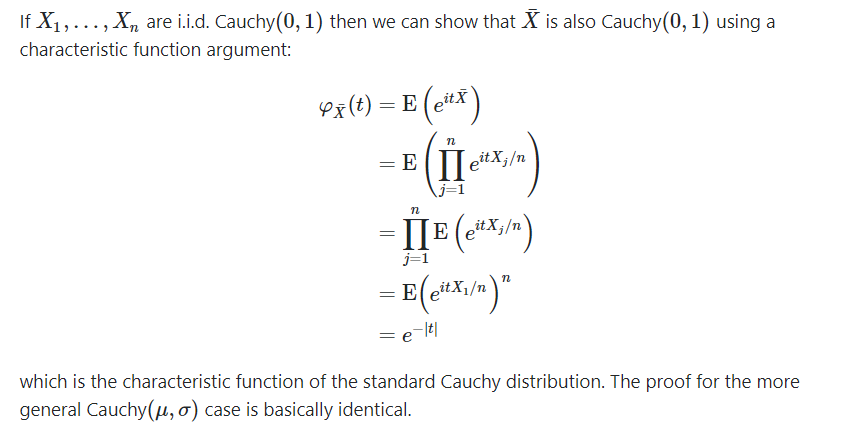

In [30]:
# Используем тест Смирнова-Колмогорова для проверки гипотезы соответствия распределения среднего распределению Коши
res = stats.kstest(x, stats.cauchy.cdf)

if res.pvalue > 0.05:
    print('Принадлежит распредлению Коши: p_value > 0.05')
else:
    print('Не принадлежит распредлению Коши: p_value < 0.05')

Принадлежит распредлению Коши: p_value > 0.05


#### Эксперимент с семинара

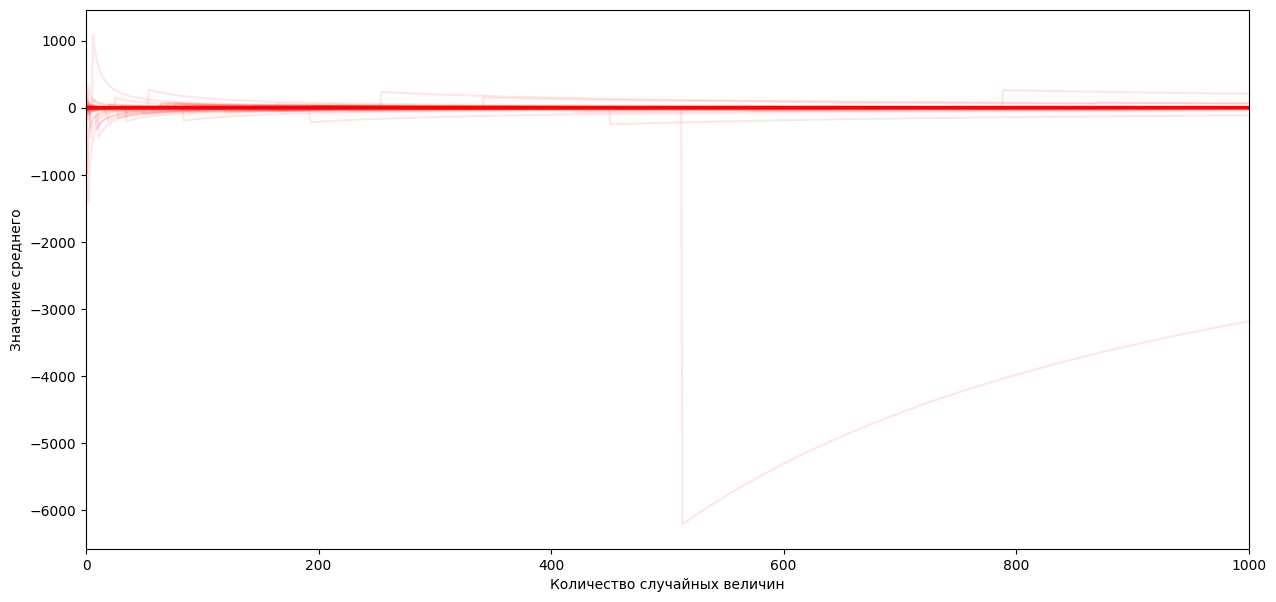

In [18]:
size = 1000
samples_count = 500

sample = cauchy_dist.sample([samples_count,size])

x = tf.range(size,dtype=tf.float32) + 1 

means = tf.math.cumsum(sample,axis=1) / x

plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(x, means[i], alpha=0.1, color='red')

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

3. Аналогичным образом проведите эксперимент по изучению зависимости выборочной медианы от размера выборки. Медиану по выборке можно посчитать с помощью [`np.median`](https://numpy.org/doc/stable/reference/generated/numpy.median.html).

Нормально: p_value: 0.658336877822876 > 0.05


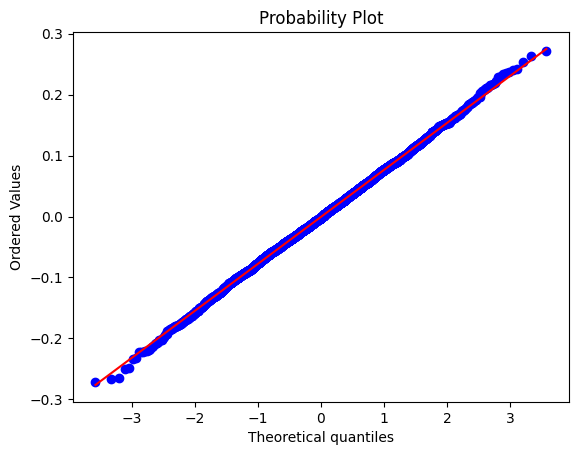

In [98]:
import tensorflow as tf
import tensorflow_probability as tfp

n = 400
x = tfp.stats.percentile(cauchy_dist.sample([n*10,n]),50.,axis=1,interpolation='midpoint')


stats.probplot(x, dist="norm",plot=plt)
res = stats.shapiro(x)
if res.pvalue > 0.05:
    print('Нормально: p_value: {} > 0.05'.format(res.pvalue))
else:
    print('Ненормально: p_value: {} < 0.05'.format(res.pvalue))

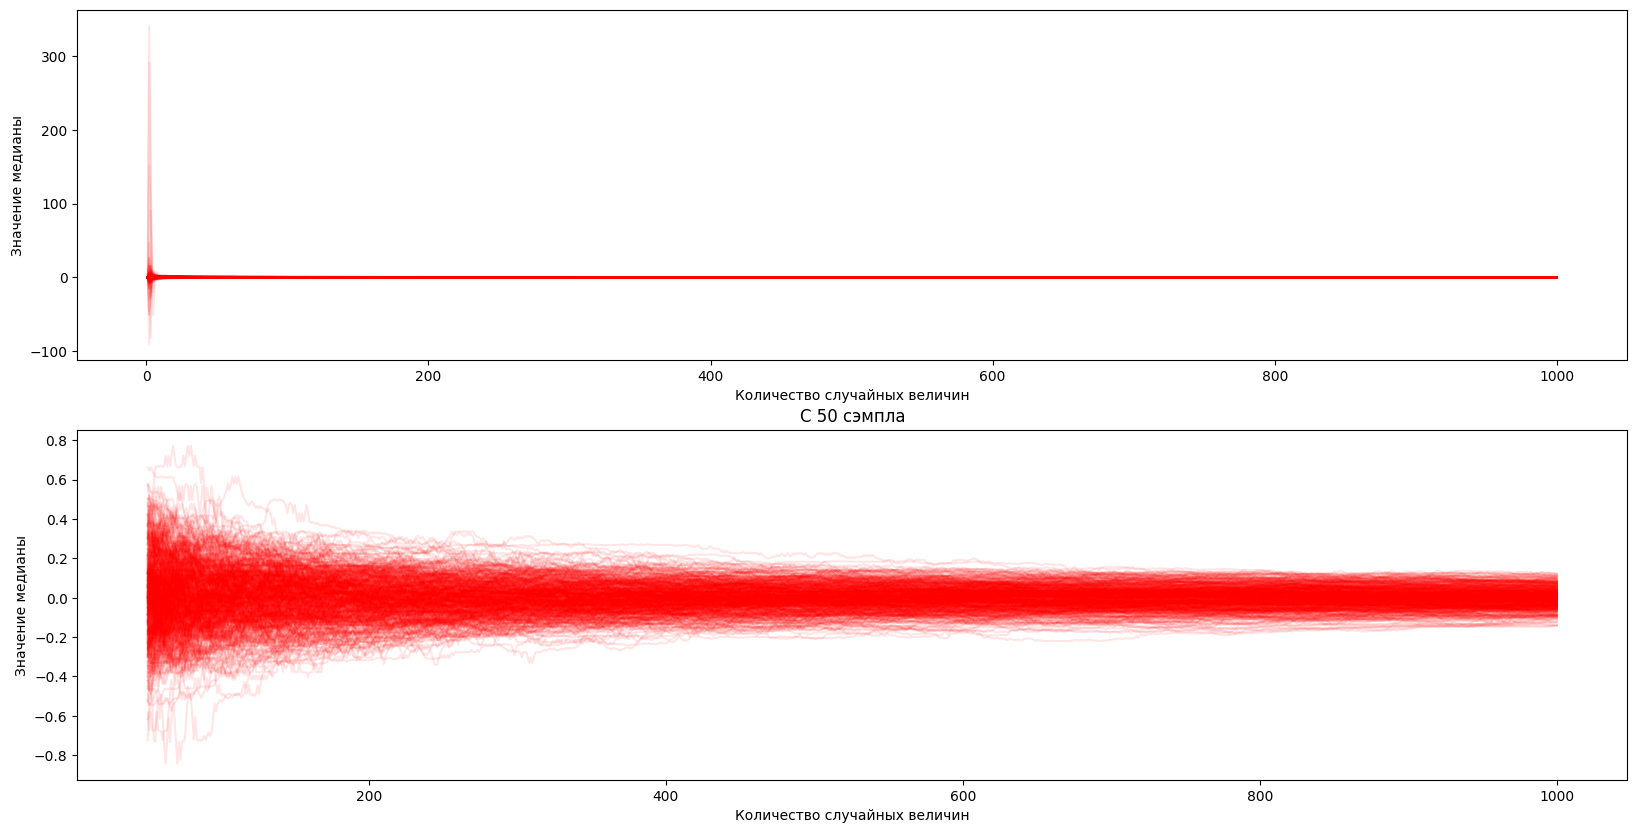

In [32]:
size = 1000
samples_count = 500

sample = cauchy_dist.sample([samples_count,size])

x = tf.range(size,dtype=tf.float32) + 1 
medians = np.zeros((samples_count,size))
for i in range(1,size):
    medians[:,i] = tfp.stats.percentile(sample[:,:i],50.,axis=1,interpolation='midpoint')

fig,ax = plt.subplots(2,1,figsize=(20,10))

for i in range(samples_count):
    ax[0].plot(x, medians[i], alpha=0.1, color='red')
# рисуем с 50 сэмпла
for i in range(samples_count):
    ax[1].plot(x[50:], medians[i,50:], alpha=0.1, color='red')   

ax[0].set(xlabel = 'Количество случайных величин', ylabel = 'Значение медианы')
ax[1].set(title= 'С 50 сэмпла',xlabel = 'Количество случайных величин', ylabel = 'Значение медианы')
pass

### Задача 3

Постройте графики плотности для трех распределений: нормального, равномерного и эспоненциального. Вы можете пользоваться кодом из файла scipy.ipynb. Обязательно спользуйте метод `.pdf()`

#### 1. Нормальное распределение 

На одном рисунке постройте по 3 графика плотности <b>нормального</b> распределения, изменяя:

 - только параметр `scale` [1, 2, 0.25]
 - только параметр `loc` [-2, 0, 1]
 - одновременно изменяя и `scale` и `loc` [(1, 0), (1, 2), (2, 0)]

У вас должно получиться три картинки по три графика на каждой (не сетка графиков!).

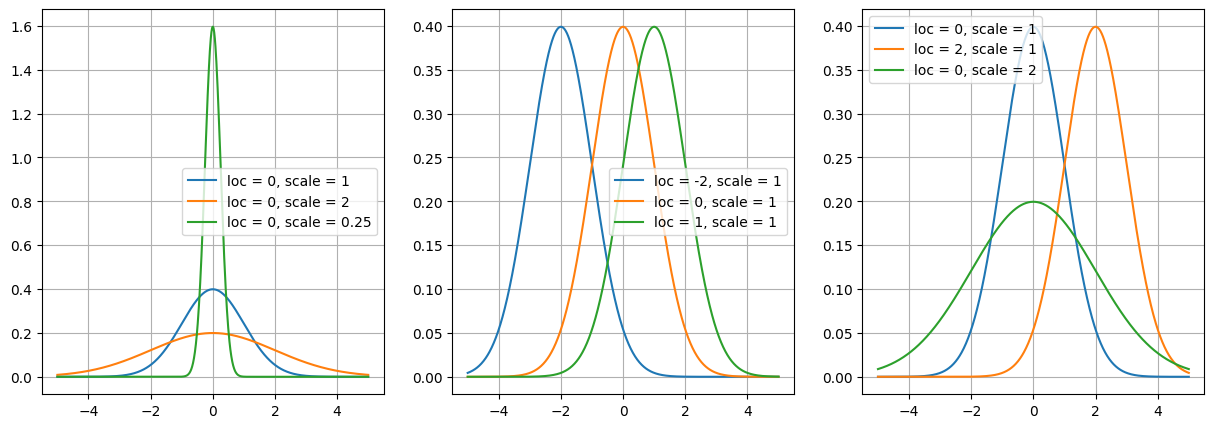

In [94]:
def draw_scaled_shifted_distr(
    params: list[tuple[float, float]],
    x: tf.Tensor,
    std_distr: tfd.Distribution,
    ax: plt.Axes,
) -> None:
    """
    Performs shifts and scales with locs, scales and params args
    """
    tfb = tfp.bijectors
    scales, locs = zip(*params)
    shift_scale = tfd.TransformedDistribution(
        distribution=std_distr,
        bijector=tfb.Shift(locs)(tfb.Scale(scales)),
    )
    ax.plot(
        x,
        shift_scale.prob(x),
        label=[f"loc = {loc}, scale = {scale}" for scale, loc in params],
    )
    ax.legend()
    ax.grid()


std_distr = tfd.Normal(0, 1)

input_params = [
    [(1, 0), (2, 0), (0.25, 0)],
    [(1, -2), (1, 0), (1, 1)],
    [(1, 0), (1, 2), (2, 0)],
]
x = tf.cast(tf.linspace([-5] * 3, [5] * 3, 1000), dtype=tf.float32)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, params in enumerate(input_params):
    draw_scaled_shifted_distr(params, x, std_distr, ax[i])


Плотность нормального распределения описывается следующей формулой:

$$ p(x) = \frac{1}{\sigma \sqrt{2 \pi}} exp \left( -\frac{(x-\mu)^2}{2 \sigma ^2}\right)$$

Как параметры `loc` и `scale` связаны с параметрами распределения $\mu$ и $\sigma$? (эту информацию можно найти в документации)


**Ответ:** 

loc - матожидание $\mu$

scale - стандартное отклонение $\sigma$


Приведите примеры нормального распределения из жизни.

**Ответ:**
- Рост
  
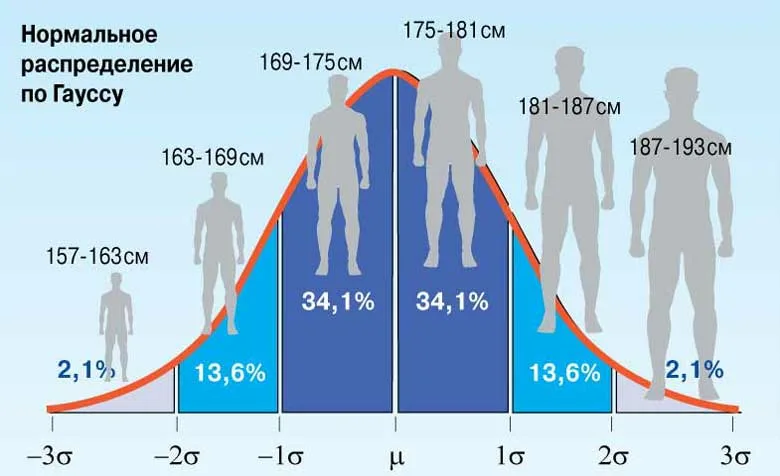
- Биномальное приближается нормальным при большом числе испытаний.
   
Классический пример - Доска Гальтона
  
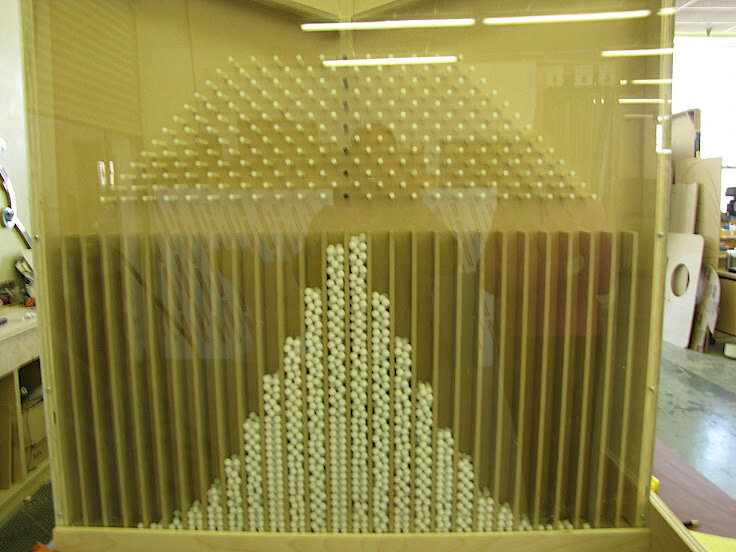


#### 2. Равномерное непрерывное распределение

На одном рисунке постройте по 3 графика плотности <b>равномерного непрерывного</b> распределения, изменяя:
 - только параметр `scale` [1, 2, 0.25]
 - только параметр `loc` [1, -2, 3]
 - одновременно изменяя и `scale` и `loc` [(1, 0), (1, 2), (2, 0)]

 У вас должно получиться три картинки по три графика на каждой (не сетка графиков!).

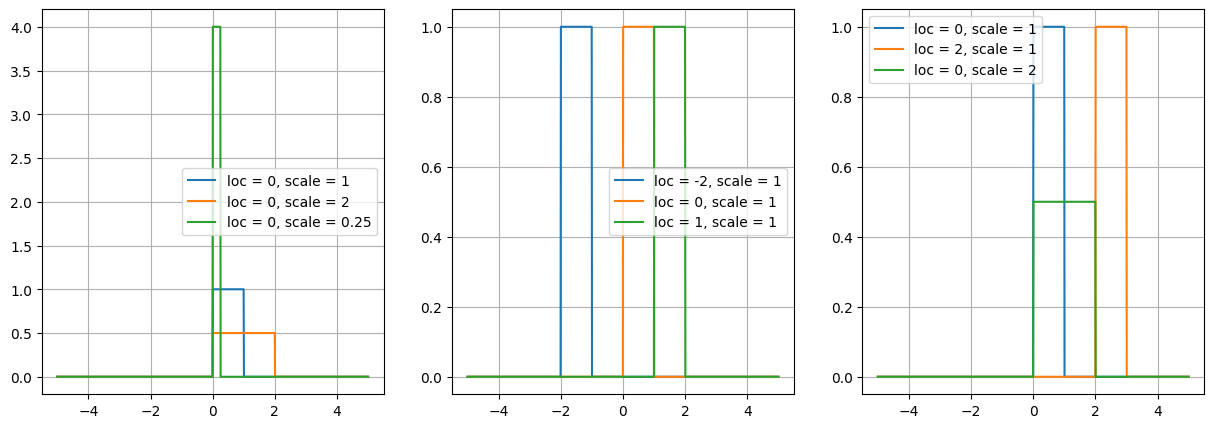

In [95]:
std_distr = tfd.Uniform(0,1)
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,params in enumerate(input_params):
    draw_scaled_shifted_distr(params, x, std_distr,ax[i])

Плотность равномерного непрерывного распределения описывается следующей формулой:

$$p(x) = \frac{1}{b-a} I\{x\in [a, b]\}$$

Как параметры `loc` и `scale` связаны с параметрами распределения $a$ и $b$? (эту информацию можно найти в документации)


**Ответ:**

loc = a

scale = b -a 

Приведите примеры равномерного непрерывного распределения из жизни.

**Ответ:**

- Бета распределение в случае a,b = 1. Используется как сопряженное распределение для Бернуллевской случайной величины

- Наивное предположение о регулярном графике. Например, вероятность прождать автобус x минут, приходящего раз в 30 минут

#### 3. Экспоненциальное распределение

На одном рисунке постройте по 3 графика плотности <b>экспоненциального</b> распределения, изменяя:
 - только параметр `scale` [1, 2, 0.25]
 - только параметр `loc` [-1, 0, 2]
 - одновременно изменяя и `scale` и `loc` [(1, 0), (1, 2), (2, 0)]
 
 У вас должно получиться три картинки по три графика на каждой (не сетка графиков!).

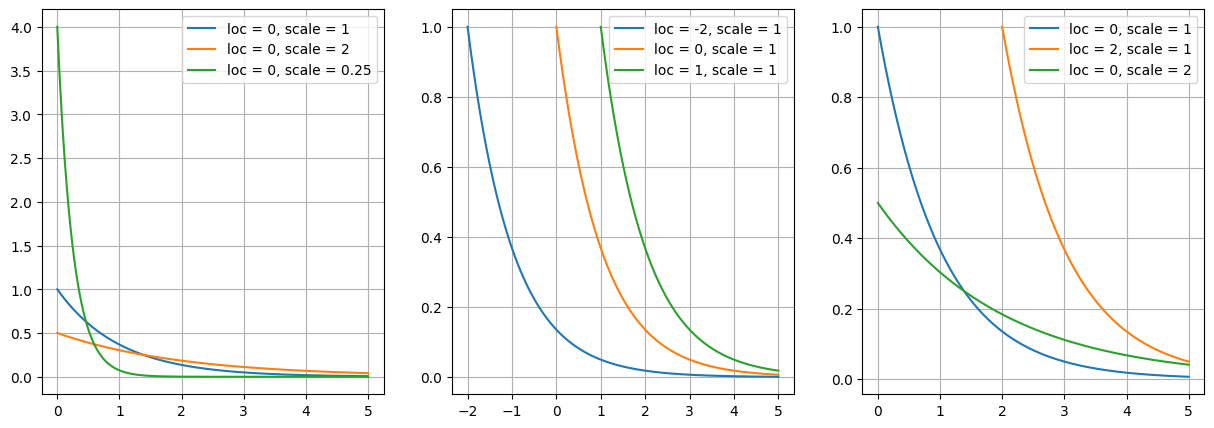

In [96]:
std_distr = tfd.Exponential(1)
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,params in enumerate(input_params):
    _, locs = zip(*params)
    x = tf.cast(tf.linspace(locs,[5]*3,1000),dtype=tf.float32)
    draw_scaled_shifted_distr(params, x, std_distr,ax[i])


Плотность экспоненциального распределения описывается следующей формулой:

$$p(x) = \lambda e^{\lambda x} I\{x>0\}$$

Как параметры `loc` и `scale` связаны с параметром распределения $\lambda$? (эту информацию можно найти в документации)


**Ответ:**

$scale = \frac{1}{\lambda} $ 

Приведите примеры экспоненциального распределения из жизни.

**Ответ:**

- Время между двумя последовательным посещениями клиентов магазина
- Время между повторным излучением фотонов

### Задача 4

Задача в [контесте](https://contest.yandex.ru/contest/46649/problems/) 

### Задача 5

Создайте матрицу 10х10, каждый элемент которой равен сумме индексов этого элемента.  Используйте numpy.  Визуализируйте с помощью `plt.imshow()`.

**Запрещено использовать циклы и list comprehension.** 

*Подсказка:* можно использовать np.broadcast и изменение формы массива.

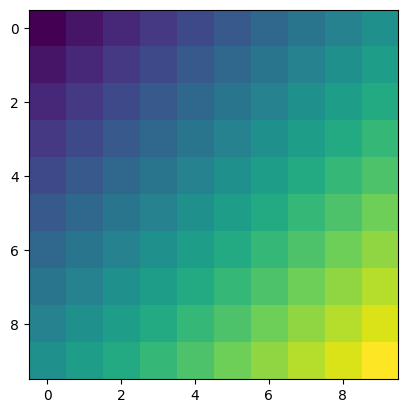

In [41]:
# Ваш код здесь
x = np.arange(10) + np.arange(10)[np.newaxis].T
plt.imshow(x)

### Задача 6


Задача в [контесте](https://contest.yandex.ru/contest/46649/problems/) 